<a href="https://colab.research.google.com/github/dominikjagoda/my-first/blob/main/DeepLearning_zad2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier
import numpy as np
from sklearn.model_selection import train_test_split

####################################################
# Load dataset with faces
from sklearn.datasets import fetch_lfw_people

# #############################################################################
# Download the data, if not already on disk and load it as numpy arrays

lfw_people = fetch_lfw_people(min_faces_per_person=100, resize=0.50)  
print(lfw_people.images.shape)


# introspect the images arrays to find the shapes (for plotting)
n_samples, h, w = lfw_people.images.shape

# for machine learning we use the 2 data directly (as relative pixel
# positions info is ignored by this model)
X = lfw_people.data
n_features = X.shape[1]

# the label to predict is the id of the person
y = lfw_people.target
# to get real names, not digits
target_names = lfw_people.target_names

# split into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42)

print("Image shape: ",X_train.shape)
# dimension of face image
nfaces, h, w = lfw_people.images.shape
print("Image shape: ", h, w)

(1140, 62, 47)
Image shape:  (855, 2914)
Image shape:  62 47


In [6]:
# train the model

clf = MLPClassifier(hidden_layer_sizes=(100,50),solver='adam',verbose=10,early_stopping=True)
clf.fit(X_train,y_train)
score = clf.score(X_test,y_test)
score2 = clf.score(X_train,y_train)
print(score)
print(score2)


Iteration 1, loss = inf
Validation score: 0.116279
Iteration 2, loss = inf
Validation score: 0.348837
Iteration 3, loss = inf
Validation score: 0.255814
Iteration 4, loss = inf
Validation score: 0.244186
Iteration 5, loss = inf
Validation score: 0.244186
Iteration 6, loss = 128.58077650
Validation score: 0.197674
Iteration 7, loss = 112.13472725
Validation score: 0.151163
Iteration 8, loss = 47.53391108
Validation score: 0.372093
Iteration 9, loss = 43.19722222
Validation score: 0.348837
Iteration 10, loss = 42.74685912
Validation score: 0.348837
Iteration 11, loss = 28.60744589
Validation score: 0.279070
Iteration 12, loss = 19.63285177
Validation score: 0.360465
Iteration 13, loss = 19.72650834
Validation score: 0.383721
Iteration 14, loss = 19.25755502
Validation score: 0.337209
Iteration 15, loss = 15.07490882
Validation score: 0.372093
Iteration 16, loss = 14.89110087
Validation score: 0.313953
Iteration 17, loss = 22.21846511
Validation score: 0.372093
Iteration 18, loss = 22.628

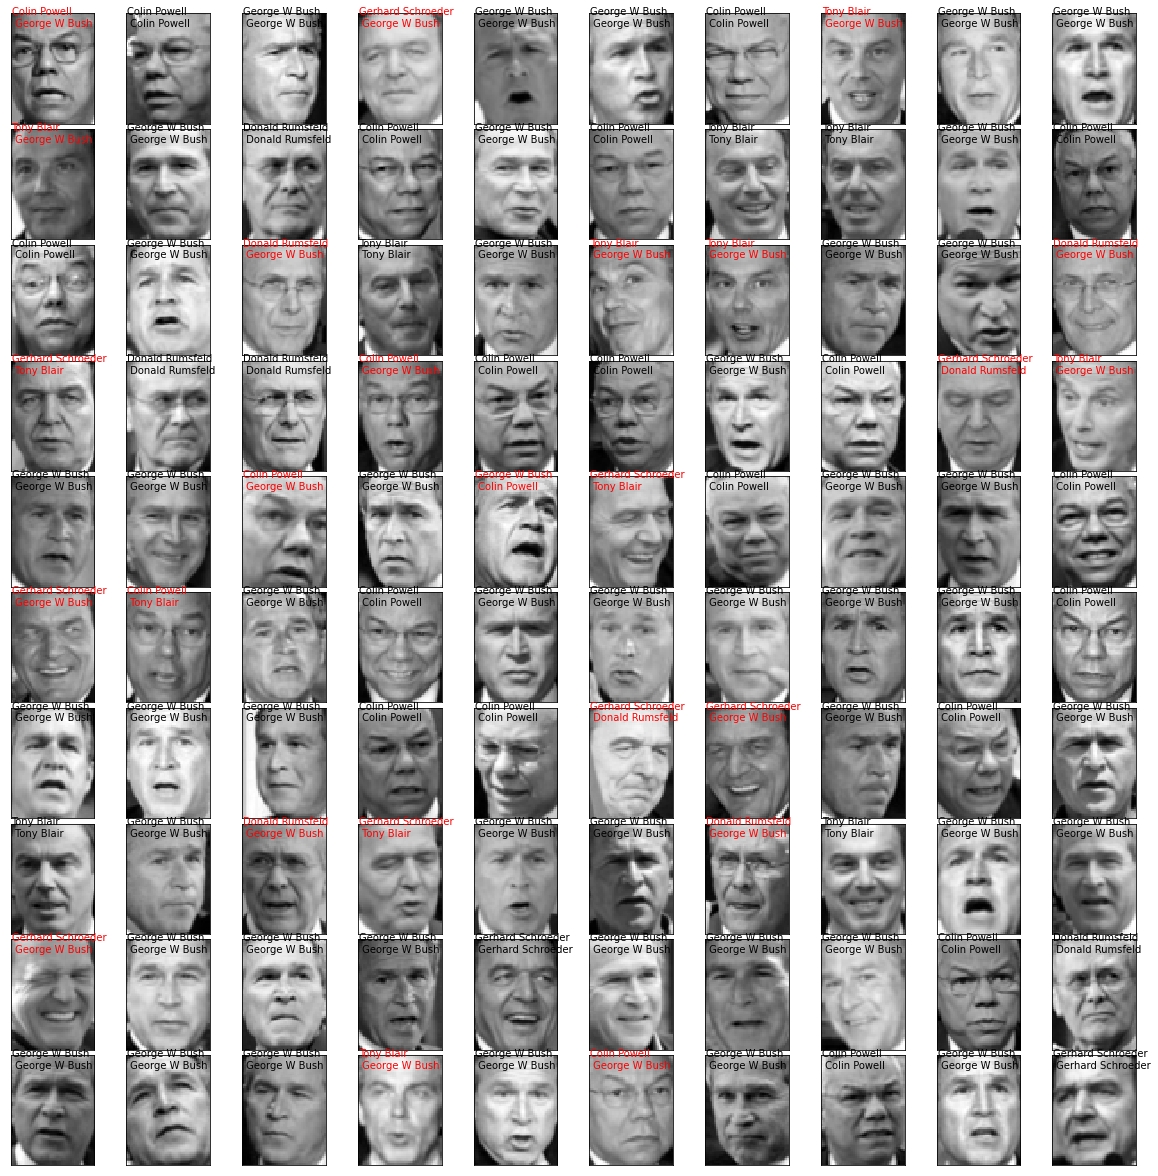

In [7]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(16, 16)) # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
for i in range(100):
  ax = fig.add_subplot(10, 10, i + 1, xticks=[], yticks=[])
  ax.imshow(X_test[i].reshape(h,w), cmap=plt.cm.gray, interpolation='nearest')
  # label the image with the target valu
  #ax.text(0, 7, str(target_names[y_test[i]]))
  predicted = clf.predict(X_test)
  expected = y_test
  if str(target_names[expected[i]]) != str(target_names[predicted[i]]):
    ax.text(0, 7, str(target_names[expected[i]])+"\n "+str(target_names[predicted[i]]), color='red')
  else:
    ax.text(0, 7, str(target_names[expected[i]])+"\n "+str(target_names[predicted[i]]), color='black')


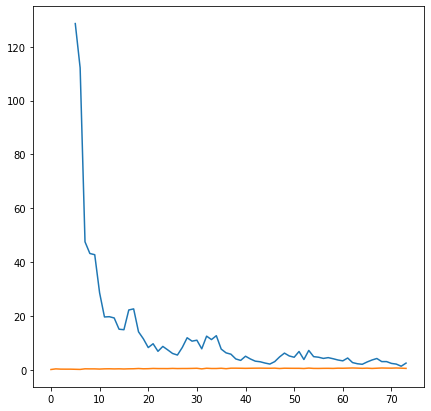

In [8]:
plt.figure(figsize=(7,7))
plt.plot(clf.loss_curve_)
plt.plot(np.asarray(clf.validation_scores_))

plt.show()

In [9]:
from sklearn import metrics
print(metrics.classification_report(expected, predicted))

              precision    recall  f1-score   support

           0       0.93      0.78      0.85        64
           1       0.78      0.44      0.56        32
           2       0.75      0.97      0.85       127
           3       1.00      0.24      0.39        29
           4       0.52      0.67      0.59        33

    accuracy                           0.76       285
   macro avg       0.80      0.62      0.65       285
weighted avg       0.79      0.76      0.74       285



In [10]:
print(metrics.confusion_matrix(expected, predicted))

[[ 50   1   8   0   5]
 [  2  14  12   0   4]
 [  1   1 123   0   2]
 [  0   2  11   7   9]
 [  1   0  10   0  22]]
